# Read Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
train=pd.read_csv("C:/YSPM/Machin_Learning_Project/Datasets/train.csv")

In [5]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# non statical columns droping
for i in train:
    print(i,len(train[i].unique()))

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 111
LotArea 1073
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 637
BsmtFinType2 7
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageYrBlt 98
GarageFinish 4
GarageCars 5
GarageArea 441
GarageQual 6
GarageCond 6
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 4
Fence 5
MiscFeature 5
MiscV

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

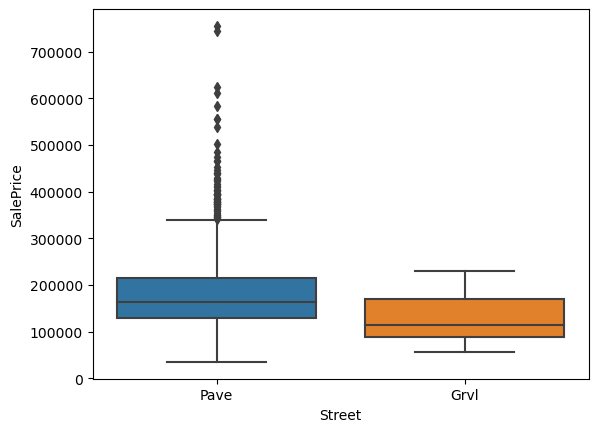

In [7]:
sb.boxplot(x='Street',y='SalePrice',data=train)

In [8]:
train=train.drop("Id",axis=1)

## Missing data treatment

In [9]:
train.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [10]:
train=train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [11]:
def filler(df):
    import  pandas as pd
    Q=pd.DataFrame(df.isna().sum(),columns=['ct'])
    W=Q[Q.ct>0].index
    for i in W:
        if df[i].dtypes=='object':
            X=df[i].mode()[0]
            df[i]=df[i].fillna(X)
        else:
            X=df[i].mean()
            df[i]=df[i].fillna(X)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [13]:
filler(train)

In [14]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [15]:
train.skew()['SalePrice']

1.8828757597682129

In [16]:
k=train.skew()
k

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

<AxesSubplot:>

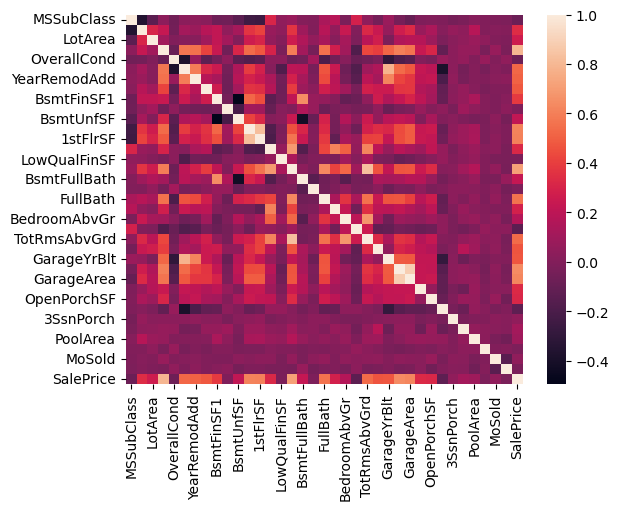

In [17]:
cor=train.corr()
sb.heatmap(cor)

In [18]:
table=pd.DataFrame(train.corr()['SalePrice'])

In [19]:
table['skew']=k

In [20]:
table.sort_values(by=['skew'])

,SalePrice,skew
GarageYrBlt,0.470177,-0.668175
YearBuilt,0.522897,-0.613461
YearRemodAdd,0.507101,-0.503562
GarageCars,0.640409,-0.342549
FullBath,0.560664,0.036562
YrSold,-0.028923,0.096269
GarageArea,0.623431,0.179981
BedroomAbvGr,0.168213,0.211790
MoSold,0.046432,0.212053
OverallQual,0.790982,0.216944


In [21]:
p=table['skew']

In [22]:
skew=p[p>0.7].index
skew

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [23]:
train=train.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', ],axis=1)
train

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2,548,TA,TA,Y,2,2008,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,2,460,TA,TA,Y,5,2007,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2,608,TA,TA,Y,9,2008,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,3,642,TA,TA,Y,2,2006,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,3,836,TA,TA,Y,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,2,460,TA,TA,Y,8,2007,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,2,500,TA,TA,Y,2,2010,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,1,252,TA,TA,Y,5,2010,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,1,240,TA,TA,Y,4,2010,WD,Normal,142125


In [24]:
# defineing X and Y 

In [25]:
# defining X and Y
Y=train[["SalePrice"]]
X=train.drop('SalePrice',axis=1)


In [26]:
# preprocessing Data
con=[]
cat=[]
for i in X:
    if X[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [27]:
con

['OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'YrSold']

In [28]:
cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1=pd.get_dummies(X[cat])

In [30]:
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X=X2.join(X1)

In [31]:
from statsmodels.api import add_constant,OLS
X=add_constant(X)
ols=OLS(Y,X)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     51.20
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:50:48   Log-Likelihood:                -16878.
No. Observations:                1460   AIC:                         3.419e+04
Df Residuals:                    1245   BIC:                         3.532e+04
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.109e+04   3041.472      3.648      0.000    5127.050    1.71e+04
OverallQual            1.422e+04   1629.052      8.728      0.000     1.1e+04    1.74e+04
OverallCond            4681.0173   1139.792      4.107      0.000    2444.893    6917.142
YearBuilt              3230.7311   2666.861      1.211      0.226   -2001.307    8462.769
YearRemodAdd           2704.9588   1364.533      1.982      0.048      27.921    5381.996
BsmtFullBath           4206.4701   1048.027      4.014      0.000    2150.376    6262.565
FullBath               1.048e+04   1358.146      7.714      0.000    7812.535    1.31e+04
HalfBath               4005.2955   1222.204      3.277      0.001    1607.488    6403.102
BedroomAbvGr          -1081.2953   1303.108     -0.830      0.407   -3637.826    1475.236
TotRmsAbvGrd           1.358e+04   1585.837      8.564      0.000    1.05e+04    1.67e+04
Fireplaces             6464.4515   1147.183      5.635      0.000    4213.825    8715.078
GarageYrBlt           -3029.9393   1606.303     -1.886      0.059   -6181.300     121.421
GarageCars             1484.5745   1970.063      0.754      0.451   -2380.435    5349.584
GarageArea             9113.0564   1965.712      4.636      0.000    5256.582     1.3e+04
MoSold                -1306.6666    787.590     -1.659      0.097   -2851.816     238.483
YrSold                -1356.8604    814.017     -1.667      0.096   -2953.857     240.136
MSZoning_C (all)      -2.293e+04   9682.842     -2.368      0.018   -4.19e+04   -3936.611
MSZoning_FV            1.326e+04   7059.833      1.878      0.061    -594.379    2.71e+04
MSZoning_RH            8389.0414   7101.841      1.181      0.238   -5543.856    2.23e+04
MSZoning_RL            7105.7604   3758.210      1.891      0.059    -267.364    1.45e+04
MSZoning_RM            5276.2207   4198.415      1.257      0.209   -2960.528    1.35e+04
Street_Grvl            -206.9660   7464.929     -0.028      0.978   -1.49e+04    1.44e+04
Street_Pave             1.13e+04   6838.583      1.653      0.099   -2115.426    2.47e+04
LotShape_IR1          -5742.5491   3104.193     -1.850      0.065   -1.18e+04     347.478
LotShape_IR2           2944.2683   4459.233      0.660      0.509   -5804.173    1.17e+04
LotShape_IR3           1.897e+04   7770.734      2.441      0.015    3722.835    3.42e+04
LotShape_Reg          -5075.7062   3208.764     -1.582      0.114   -1.14e+04    1219.475
LandContour_Bnk        1412.0549   3732.180      0.378      0.705   -5910.002    8734.112
LandContour_HLS        4063.0065   3867.748      1.050      0.294   -3525.018    1.17e+04
LandContour_Low       -1403.0745   4916.357     -0.285      0.775    -1.1e+04    8242.185
LandContour_Lvl        7022.0395   2784.325      2.522      0.012    1559.553    1.25e+04
Utilities_AllPub       

In [32]:
Q=pd.DataFrame(model.pvalues,columns=['ct'])
W=Q[Q.ct>0.7].index
X=X.drop(W,axis=1)

In [33]:
from statsmodels.api import add_constant,OLS
X=add_constant(X)
ols=OLS(Y,X)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     60.89
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:50:49   Log-Likelihood:                -16879.
No. Observations:                1460   AIC:                         3.413e+04
Df Residuals:                    1275   BIC:                         3.511e+04
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8184.5996   9307.422      0.879      0.379   -1.01e+04    2.64e+04
OverallQual            1.414e+04   1574.391      8.984      0.000    1.11e+04    1.72e+04
OverallCond            4680.0050   1091.248      4.289      0.000    2539.166    6820.844
YearBuilt              3111.7135   2485.202      1.252      0.211   -1763.821    7987.248
YearRemodAdd           2671.5201   1335.085      2.001      0.046      52.316    5290.724
BsmtFullBath           4150.3113   1024.173      4.052      0.000    2141.061    6159.561
FullBath                1.05e+04   1322.184      7.939      0.000    7903.103    1.31e+04
HalfBath               4041.0333   1195.635      3.380      0.001    1695.406    6386.661
BedroomAbvGr          -1086.7956   1272.385     -0.854      0.393   -3582.995    1409.404
TotRmsAbvGrd           1.364e+04   1541.672      8.849      0.000    1.06e+04    1.67e+04
Fireplaces             6423.9957   1123.170      5.720      0.000    4220.530    8627.461
GarageYrBlt           -3030.1860   1548.739     -1.957      0.051   -6068.542       8.170
GarageCars             1423.1426   1921.331      0.741      0.459   -2346.175    5192.461
GarageArea             9084.8516   1917.315      4.738      0.000    5323.412    1.28e+04
MoSold                -1338.3076    767.351     -1.744      0.081   -2843.717     167.102
YrSold                -1394.9504    791.213     -1.763      0.078   -2947.172     157.271
MSZoning_C (all)      -2.353e+04   9371.427     -2.511      0.012   -4.19e+04   -5146.735
MSZoning_FV            1.273e+04   5149.179      2.472      0.014    2629.324    2.28e+04
MSZoning_RH            8036.1667   6950.197      1.156      0.248   -5598.912    2.17e+04
MSZoning_RL            6234.1402   3922.315      1.589      0.112   -1460.760    1.39e+04
MSZoning_RM            4715.0213   4058.770      1.162      0.246   -3247.581    1.27e+04
Street_Pave            1.148e+04   1.35e+04      0.852      0.395    -1.5e+04    3.79e+04
LotShape_IR1          -6117.4708   3674.439     -1.665      0.096   -1.33e+04    1091.141
LotShape_IR2           2383.4850   4843.294      0.492      0.623   -7118.217    1.19e+04
LotShape_IR3           1.732e+04   7806.680      2.219      0.027    2006.574    3.26e+04
LotShape_Reg          -5403.3392   3749.587     -1.441      0.150   -1.28e+04    1952.698
LandContour_HLS        3575.7920   5401.071      0.662      0.508   -7020.172    1.42e+04
LandContour_Lvl        6411.3759   3797.929      1.688      0.092   -1039.501    1.39e+04
Utilities_AllPub       2.484e+04   3.01e+04      0.824      0.410   -3.43e+04     8.4e+04
LotConfig_Corner       8063.7033   3863.615      2.087      0.037     483.963    1.56e+04
LotConfig_CulDSac      1.835e+04   4384.726      4.186      0.000    9751.891     2.7e+04
LotConfig_FR2         -

In [34]:
# Model Formation

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.2,random_state=31)

In [36]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,pred_tr)
ts_err=mean_absolute_error(ytest,pred_ts)
print(f"---==================----")
print(f"Training Error:{tr_err}")
print(f"Testing Error:{ts_err}")
if (tr_err<ts_err):
    print(f"Overfitted")
else:
    print(f"Underfitted")
print(f"---==================----")


---==================----
Training Error:16452.547089041094
Testing Error:923450144.0787672
Overfitted
---==================----


In [37]:
def mul_col(df,ycol,xcols):
    import pandas as pd
    def filler(df):
            import  pandas as pd
            Q=pd.DataFrame(df.isna().sum(),columns=['ct'])
            W=Q[Q.ct>0].index
            for i in W:
                if df[i].dtypes=='object':
                    X=df[i].mode()[0]
                    df[i]=df[i].fillna(X)
                else:
                    X=df[i].mean()
                    df[i]=df[i].fillna(X)
    
    filler(df)
    Y=df[ycol]
    X=df[xcols]
    
   
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    model=lm.fit(xtrain,ytrain)
    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,pred_tr)
    ts_err=mean_absolute_error(ytest,pred_ts)
    print(f"---=======@=@=========----")
    print(f"{ycol}~~~~{xcols}")
    print(f"Training Error:{tr_err}")
    print(f"Testing Error:{ts_err}")
    if (tr_err<ts_err):
        print(f"Overfitted")
    else:
        print(f"Underfitted")
    print(f"---=======@=@=========----")

In [38]:
mul_col(train,["SalePrice"],["OverallQual","OverallCond"])

---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond']
Training Error:33503.75711358481
Testing Error:34247.93654347757
Overfitted
---=======@=@=========----


In [39]:
con=[]
cat=[]
for i in train.columns:
    if train[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
   

In [40]:
W=[]
for i in con:
    W.append(i)
    K=mul_col(train,["SalePrice"],W)

---=======@=@=========----
['SalePrice']~~~~['OverallQual']
Training Error:33507.1897800526
Testing Error:34240.93998025396
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond']
Training Error:33503.75711358481
Testing Error:34247.93654347757
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond', 'YearBuilt']
Training Error:32782.45376844081
Testing Error:34530.6313449483
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
Training Error:32605.707478423923
Testing Error:34252.82461969842
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath']
Training Error:32095.61005102348
Testing Error:33299.444469474496
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice

In [41]:
# Making Ridge Model
a=0.001
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr=Ridge(a)
    model=rr.fit(X,Y)
    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,pred_tr)
    ts_err=mean_absolute_error(ytest,pred_ts)
    print(f"---========={a}=========----")
    print(f"Training Error:{tr_err}")
    print(f"Testing Error:{ts_err}")
    if (tr_err<ts_err):
        print(f"Overfitted")
    else:
        print(f"Underfitted")
    print(f"---==================----")
    a=a+0.005
    

---=========0.001=========----
Training Error:16587.074064210618
Testing Error:18454.788115989493
Overfitted
---==================----
---=========0.006=========----
Training Error:16588.646156670216
Testing Error:18455.295701289786
Overfitted
---==================----
---=========0.011=========----
Training Error:16590.16957408072
Testing Error:18455.792742804577
Overfitted
---==================----
---=========0.016=========----
Training Error:16591.667868541408
Testing Error:18456.279609873476
Overfitted
---==================----
---=========0.021=========----
Training Error:16593.277482819725
Testing Error:18456.7566453317
Overfitted
---==================----
---=========0.026000000000000002=========----
Training Error:16594.921942221634
Testing Error:18457.25970646795
Overfitted
---==================----
---=========0.031000000000000003=========----
Training Error:16596.69143641608
Testing Error:18457.78020359554
Overfitted
---==================----
---=========0.03600000000000000

In [42]:
# Making Lasso Model
a=1.00
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr=Ridge(a)
    model=rr.fit(X,Y)
    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,pred_tr)
    ts_err=mean_absolute_error(ytest,pred_ts)
    print(f"---========={a}=========----")
    print(f"Training Error:{tr_err}")
    print(f"Testing Error:{ts_err}")
    if (tr_err<ts_err):
        print(f"Overfitted")
    else:
        print(f"Underfitted")
    print(f"---==================----")
    a=a+0.025

---=========1.0=========----
Training Error:16826.644751307456
Testing Error:18660.50595308579
Overfitted
---==================----
---=========1.025=========----
Training Error:16830.728243201345
Testing Error:18663.564584515865
Overfitted
---==================----
---=========1.0499999999999998=========----
Training Error:16834.6781161778
Testing Error:18666.502393344403
Overfitted
---==================----
---=========1.0749999999999997=========----
Training Error:16838.524783344743
Testing Error:18669.324453685105
Overfitted
---==================----
---=========1.0999999999999996=========----
Training Error:16842.368439018
Testing Error:18672.416857543012
Overfitted
---==================----
---=========1.1249999999999996=========----
Training Error:16846.089052286014
Testing Error:18675.658939889512
Overfitted
---==================----
---=========1.1499999999999995=========----
Training Error:16849.780958302403
Testing Error:18678.792839650265
Overfitted
---==================---

In [46]:
test=pd.read_csv("C:/YSPM/Machin_Learning_Project/Datasets/test.csv")

In [47]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [48]:
filler(test)

In [49]:
col=list(xtest.columns)

In [50]:
col

['const',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhoo

In [51]:
con=[]
cat=[]
for i in test:
    if test[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(test[con]),columns=con)
X1=pd.get_dummies(test[cat])
X=X2.join(X1)

In [56]:
col_add=['const', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'GarageQual_Ex']

In [57]:
for i in col_add:
    X[i]=0

In [67]:
final_pred=model.predict(X[col])

In [68]:
list(final_pred)

[array([113755.14095626]),
 array([147880.18295575]),
 array([163259.18883366]),
 array([188486.98359365]),
 array([204030.10515346]),
 array([167635.2107103]),
 array([173640.46855073]),
 array([167416.52886048]),
 array([197315.44356599]),
 array([112260.0212438]),
 array([154345.55114637]),
 array([97375.05677129]),
 array([91877.02782874]),
 array([139102.51299712]),
 array([93549.75468691]),
 array([374953.84629099]),
 array([256798.80921675]),
 array([321993.88674624]),
 array([327297.09917599]),
 array([444846.95707864]),
 array([316305.28852617]),
 array([219576.15957093]),
 array([161654.51791101]),
 array([173765.77830236]),
 array([204440.91538434]),
 array([192264.09992157]),
 array([347495.89832635]),
 array([219202.40887333]),
 array([195020.54450397]),
 array([242311.29761258]),
 array([210229.90618777]),
 array([99655.55016431]),
 array([232769.74373741]),
 array([329764.19842477]),
 array([294847.29300186]),
 array([247414.20074272]),
 array([144811.4248567]),
 array([

In [70]:
test["Pred_Sale"]=final_pred
test.Pred_Sale=test.Pred_Sale.round()

In [71]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pred_Sale
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,113755.0
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,147880.0


In [72]:
test[["Id","Pred_Sale"]].to_csv("C:/YSPM/Machin_Learning_Project/Datasets/submission",index=False)
